# Lab 02: Correlation, Regression Analysis

Welcome to Lab 2 for CMSC/STAT 11900. We're assuming you're up-to-date with your setup and know how to naviagte Jupyter notebooks. Please reach out to a TA if you're having trouble with any of the questions in Today's lab.

*A reminder*: These lab sessions provide hands-on practice with data science tools. Attending the lab session allows you to get help when you get stuck. 

The Labs themselves are not graded or turned in, and students are not required to attend lab, but our TAs will be in every week in case you need help with the Lab or with the course in general.


In today's lab, we will learn ways to understand and quantify [the association between two variables](https://inferentialthinking.com/chapters/15/1/correlation.html).

In [ ]:
# Run this cell, but please don't change it.

# These lines import the Numpy module and scipy.optimize.minimize
import numpy as np
import pandas as pd
from scipy.optimize import minimize


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

## 1. Correlation: How Faithful is Old Faithful? 

(Note: clever title comes from [here](http://web.pdx.edu/~jfreder/M212/oldfaithful.pdf).)

Old Faithful is a geyser in Yellowstone National Park in the central United States.  It's famous for erupting on a fairly regular schedule.  You can see a video below.

In [ ]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  When it has a long eruption, there's generally a longer wait until the next eruption.

If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park and come to see the geyser when it happens.  Today, we will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption.  It includes the following columns:
- **duration**: Eruption duration, in minutes.
- **wait**: Time between this eruption and the next, also in minutes.

Run the next cell to load the dataset.

In [ ]:
faithful = pd.read_csv("faithful.csv")
faithful

We would like to use linear regression to make predictions, but that won't work well if the data aren't roughly linearly related.  To check that, we should look at the data.

#### Question 1
Make a scatter plot of the data.  We're using pandas this time, so take a look at the reference sheet on canvas to see the exact syntax for plotting values in a dataframe. It's conventional to put the column we will try to predict on the vertical axis and the other column on the horizontal axis. 

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
faithful.plot.scatter(x='duration', y='wait')
</pre>
</details>

#### Question 2
Look at the scatter plot. Are eruption duration and waiting time roughly linearly related?  Is the relationship positive, as we claimed earlier?  You may want to consult this [section](https://inferentialthinking.com/chapters/15/prediction.html) of the textbook for the definition of a linear association.

*Write your answer here, replacing this text.*

<details><summary><button>Click here to reveal the answer!</button></summary>
Yes, they seem to be linearly related!
</details>

We're going to continue with the provisional assumption that they are linearly related, so it's reasonable to use linear regression to analyze this data.

We'd next like to plot the data in standard units.  Recall that, if `nums` is an array of numbers, then

    (nums - np.mean(nums)) / np.std(nums)

is an array of those numbers in standard units.

#### Question 3
Compute the mean and standard deviation of the eruption durations and waiting times.  **Then**, create a dataframe called `faithful_standard` containing the eruption durations and waiting times in standard units.  (The columns should be named `"duration (standard units)"` and `"wait (standard units)"`.

In [ ]:
duration_mean = ...
duration_std = ...
wait_mean = ...
wait_std = ...

faithful_standard =  pd.DataFrame({
    "duration (standard units)": ...,
    "wait (standard units)": ...})
faithful_standard

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
duration_mean = np.mean(faithful['duration'])
duration_std = np.std(faithful['duration'])
wait_mean = np.mean(faithful['wait'])
wait_std = np.std(faithful['wait'])

faithful_standard =  pd.DataFrame({
    "duration (standard units)": (faithful['duration']- duration_mean) / duration_std,
    "wait (standard units)": (faithful['wait'] - wait_mean) / wait_std})
faithful_standard

</pre>
</details>

#### Question 4
Plot the data again, but this time in standard units.

In [ ]:
...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
faithful_standard.plot.scatter(x='duration (standard units)', y='wait (standard units)')
</pre>
</details>

You'll notice that this plot looks exactly the same as the last one!  The data really are different, but the axes are scaled differently.  (The method `scatter` scales the axes so the data fill up the available space.)  So it's important to read the ticks on the axes.

#### Question 5
Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

* -1
* 0
* 1

*Write your answer here, replacing this text.*

<details><summary><button>Click here to reveal the answer!</button></summary>
+1, scatter plot seems to indicate positive correlation
</details>

#### Question 6
Compute the correlation `r`.  *Hint:* Use `faithful_standard`.  This [section](https://inferentialthinking.com/chapters/15/1/Correlation.html) on correlation explains how to do this.

In [ ]:
r = ...
r

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
r = np.mean(faithful_standard['duration (standard units)'] * faithful_standard['wait (standard units)'])
</pre>
Correlation should be about .9008
</details>

## 2: Regression Analysis: The Age of the Universe

Sometimes, the primary purpose of regression analysis is to learn something about the slope or intercept of the best-fitting line.  When we use a sample of data to estimate the slope or intercept, our estimate is subject to random error, just as in the simpler case of the mean of a random sample.

In this part of the notebook, we'll use regression to get an accurate estimate for the age of the universe, using pictures of exploding stars.  Our estimate will come from a sample of all exploding stars. We'll compute a confidence interval to quantify the error caused by sampling.

### The Actual Big Bang Theory
In the early 20th century, the most popular cosmological theory suggested that the universe had always existed at a fixed size.  Today, the Big Bang theory prevails: Our universe started out very small and is still expanding.

A consequence of this is Hubble's Law, which states that every celestial object that's reasonably far away from Earth (for example, another galaxy) is moving away from us at a constant speed.  If we extrapolate that motion backwards to the time when everything in the universe was in the same place, that time is (roughly) the beginning of the universe!

Scientists have used this fact, along with measurements of the current *location* and *movement speed* of other celestial objects, to estimate when the universe started.

The cell below simulates a universe in which our sun is the center and every other star is moving away from us.  Each star starts at the same place as the sun, then moves away from it over time.  Different stars have different directions *and speeds*; the arrows indicate the direction and speed of travel.

Run the cell, then move the slider to see how things change over time.

In [ ]:
# Just run this cell.  (The simulation is actually not
# that complicated; it just takes a lot of code to draw
# everything.  So you don't need to read this unless you
# have time and are curious about more advanced plotting.)

num_locations = 15
example_velocities = pd.DataFrame({
    "x": np.random.normal(size=num_locations),
    "y": np.random.normal(size=num_locations)})
start_of_time = -2

def scatter_after_time(t, start_of_time, end_of_time, velocities, center_name, other_point_name, make_title):
    max_location = 1.1*(end_of_time-start_of_time)*max(max(abs(velocities["x"])), max(abs(velocities["y"])))
    new_locations = pd.DataFrame({
            "x": (t-start_of_time)*velocities["x"],
            "y": (t-start_of_time)*velocities["y"]})
    plt.scatter(np.array([0]), np.array([0]), label=center_name, s=100, c="yellow")
    plt.scatter(new_locations["x"], new_locations["y"], label=other_point_name)
    for i in np.arange(len(new_locations.index)):
        plt.arrow(
            new_locations["x"].iloc[i],
            new_locations["y"].iloc[i],
            velocities["x"].iloc[i],
            velocities["y"].iloc[i],
            fc='black',
            ec='black',
            head_width=0.025*max_location,
            lw=.15)
    plt.xlim(-max_location, max_location)
    plt.ylim(-max_location, max_location)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_position([0, 0, 1, 1])
    plt.legend(bbox_to_anchor=(1.6, .7))
    plt.title(make_title(t))
    plt.show()

interact(
    scatter_after_time,
    t=widgets.FloatSlider(min=start_of_time, max=5, step=.05, value=0, msg_throttle=1),
    start_of_time=fixed(start_of_time),
    end_of_time=fixed(5),
    velocities=fixed(example_velocities),
    center_name=fixed("our sun"),
    other_point_name=fixed("other star"),
    make_title=fixed(lambda t: "The world {:01g} year{} in the {}".format(abs(t), "" if abs(t) == 1 else "s", "past" if t < 0 else "future")));

#### Question 1
From the example above, when can you say the simulated universe started?

*Write your answer here, replacing this text.*

<details><summary><button>Click here to reveal the answer!</button></summary>
The simulated universe started 2 years ago
</details>

#### Question 2
After 5 years in the simulation, stars with longer arrows are further away from the Sun. Why?

**Note:** 5 years corresponds to the slider being placed all the way to the right.

*Write your answer here, replacing this text.*

<details><summary><button>Click here to reveal the answer!</button></summary>
Stars with longer arrows have higher velocities, meaning they travel a further distance in the same amount of time.</details>

### A driving analogy

Here's an analogy to illustrate how scientists use information about stars to estimate the age of the universe.

Suppose that at some point in the past, our friend Mei started driving in a car going at a steady speed of 60 miles per hour straight east.  We're still standing where she started.

In [ ]:
# Run this cell to see a picture of Mei's locations over time.

mei_velocity = pd.DataFrame({"x": [60], "y": [0]})
interact(
    scatter_after_time,
    t=widgets.FloatSlider(min=-2, max=1, step=.05, value=0, msg_throttle=1),
    start_of_time=fixed(-2),
    end_of_time=fixed(1),
    velocities=fixed(mei_velocity),
    center_name=fixed("Us"),
    other_point_name=fixed("Mei"),
    make_title=fixed(lambda t: "Mei's position {:01g} hour{} in the {}".format(abs(t), "" if abs(t) == 1 else "s", "past" if t < 0 else "future")));

We want to know how long she's been driving, but we forgot to record the time when she left.  If we find out that she's 120 miles away, and she's been going 60 miles per hour the whole time, we can infer that she left 2 hours ago.

One way we can compute that number is by fitting a line to a scatter plot of our locations and speeds.  It turns out that the *slope* of that line is the amount of time that has passed.  Run the next cell to see a picture:

In [ ]:
# Just run this cell.
small_driving_example = pd.DataFrame({
        "Name": ["Us", "Mei"],
        "Speed moving away from us (miles per hour)": [0, 60],
        "Current distance from us (miles)": [0,    120]
    })
        

small_driving_example.plot.scatter(x=1, y=2, s=200)

x_data = small_driving_example['Speed moving away from us (miles per hour)']
y_data = small_driving_example['Current distance from us (miles)']
m, b = np.polyfit(x_data, y_data, 1)
minx, maxx = np.min(x_data),np.max(x_data)
plt.plot([minx,maxx],[m*minx+b,m*maxx+b], color='blue')

# Fancy magic to draw each person's name with their dot.
with_slope_indicator = small_driving_example.append(
    {"Name": "Slope = 2\ hours", 
     "Speed moving away from us (miles per hour)": small_driving_example["Speed moving away from us (miles per hour)"].mean(), 
     "Current distance from us (miles)": small_driving_example["Current distance from us (miles)"].mean()}, ignore_index=True)
for i in range(len(with_slope_indicator.index)):
    name = with_slope_indicator["Name"].iloc[i]
    x = with_slope_indicator["Speed moving away from us (miles per hour)"].iloc[i]
    y = with_slope_indicator["Current distance from us (miles)"].iloc[i]
    plt.scatter([x - 15], [y + 15], s=1000*len(name), marker="$\mathrm{" + name + "}$")

The slope of the line is 2 hours.  (The units are vertical-axis units divided by horizontal-axis units, which are $\frac{\texttt{miles}}{\texttt{miles} / \texttt{hour}}$, or hours.)  So that's our answer.

Imagine that you don't know Mei's exact distance or speed, only rough estimates.  Then if you drew this line, you'd get a slightly bad estimate of the time since she left.  But if you measured the distance and speed of hundreds of people who left you at the same time going different speeds, and drew a line through them, the slope of that line would be a pretty good estimate of the time they left, even if the individual measurements weren't exactly right.

The `drivers.csv` dataset contains the speeds and distances-from-start of 100 drivers.  They all left the same starting location at the same time, driving at a fixed speed on a straight line away from the start.  The measurements aren't exact, so they don't fit exactly on a line.  We've created a scatter plot and drawn a line through the data.

In [ ]:
# Just run this cell.
drivers =pd.read_csv("drivers.csv")
drivers

import seaborn as sns
sns.lmplot(x="Speed moving away from us (miles per hour)",y="Current distance from us (miles)",data=drivers,fit_reg=True) 

#### Question 3
By looking at the fit line, estimate how long ago (in hours) Mei left.

In [ ]:
# Fill in the start time you infer from the above line.
driving_start_time_hours = ...
driving_start_time_hours

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
driving_start_time_hours = 100/60
</pre>
Time is 1.67 hours ago, there is a point on the line that intersects the grid at 60 miles per hour, 100 miles.
</details>


### Back to cosmology
To do the same thing for the universe, we need to know the distance-from-Earth and speed-away-from-Earth of many celestial objects.  Using pictures taken by very accurate telescopes and a lot of physics, astronomers have been able to estimate both.  It turns out that *nearby supernovae* -- stars that have recently died and exploded -- are among the best sources of this data, because they are very easy to see.  This picture taken by the Hubble telescope shows an entire galaxy, with a single supernova - as bright by itself as billions of stars - at the bottom left.

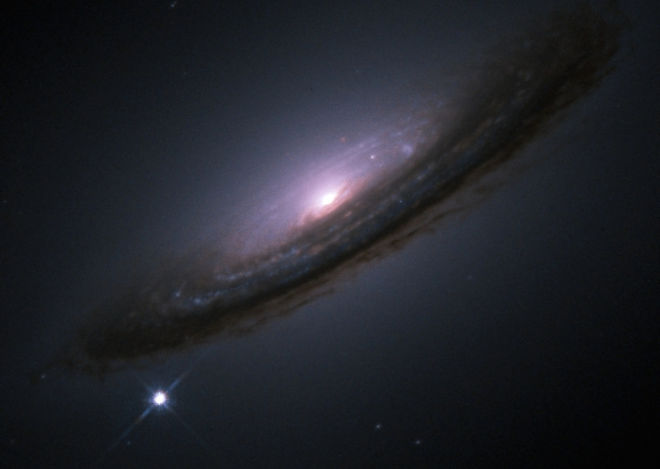

Our astronomical data for today will come from the [Supernova Cosmology Project](http://supernova.lbl.gov/union/) at Lawrence Berkeley Lab.  The original dataset is [here](http://supernova.lbl.gov/union/figures/SCPUnion2.1_mu_vs_z.txt), with (brief) documentation [here](http://supernova.lbl.gov/union/descriptions.html#Magvsz).  Each row in the table corresponds to a supernova near Earth that was observed by astronomers.  From pictures like the one above, the astronomers deduced how far away each supernova was from Earth and how fast it was moving away from Earth.  Their deductions were good, but not perfect.

Run the cell below to load the data into a table called `close_novas` and make a scatter plot. (If you prefer, you can also use the name `close_novae`; both are correct.)

In [ ]:
# Just run this cell.
close_novas = pd.read_csv("close_novas.csv")
close_novae = close_novas

sns.lmplot(x="Speed (parsecs/year)",y="Distance (million parsecs)",data=close_novas,fit_reg=True) 
close_novas

#### Question 4
Looking this plot, make a guess at the age of the universe.

**Note**: Make sure you get the units right!  In case you need to know what a parsec is, it's a big unit of distance, equivalent to 30.86 trillion kilometers.

In [ ]:
# Fill this in manually by examining the line above.
first_guess_universe_age_years = ...

# This just shows your guess as a nice string, in billions of years.
"{:,} billion years".format(round(first_guess_universe_age_years / 1e9, 2))

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
first_guess_universe_age_years = (150 * 1000000) / 0.010
</pre>
According to the graph the age of the universe is roughly 15 billion years, there is a point on the line that intersects the grid at 150 million parsecs, at 0.010 parsecs per year.
</details>


### Fitting the line yourself
The seaborn `lmplot` function is convenient, but we need to be able to calculate the slope as a number.  Recall that the least-squares regression line for our supernova data is:
* the line
* with the smallest average (over all the supernovae we observe)
* error,
* squared,
* where the error is

$$\text{the supernova's actual distance from Earth} - \text{the height of the line at that supernova's speed.}$$

#### Question 5
Define a function called `errors`.  It should take three arguments:
1. a table like `close_novas` (with the same column names and meanings, but not necessarily the same data)
2. the slope of a line (a number)
3. the intercept of a line (a number).

It should return an array of the errors made when a line with that slope and intercept is used to predict distance from speed for each supernova in the given table.  (The error is the actual distance minus the predicted distance.)

In [ ]:
def errors(tbl, slope, intercept):
    ...
    return ...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
def errors(tbl, slope, intercept):
    predicted_distances = slope * tbl['Speed (parsecs/year)'] + intercept
    return tbl['Distance (million parsecs)'] - predicted_distances
</pre>
Simply compute the y values (the distances) for each x (the speeds) and compute the resulting distances.
</details>


#### Question 6
Using `errors`, compute the errors for the line with slope `16000` and intercept `0` on the `close_novas` dataset.  Name that array `example_errors`.  Then make a scatter plot of the errors.

**Hint:** To make a scatter plot of the errors, plot the error for each supernova in the dataset.  Put the actual speed on the horizontal axis and the error on the vertical axis.

In [ ]:
example_errors = ...
...

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
example_errors = errors(close_novas, 16000, 0)
pd.DataFrame({'speed':close_novas['Speed (parsecs/year)'],
'errors':example_errors}).plot.scatter(x='speed',y='errors')
</pre>
</details>


You should find that the errors are almost all negative.  That means our line is a little bit too steep.  Let's find a better one.

#### Question 7
Define a function called `fit_line`.  It should take a table like `close_novas` (with the same column names and meanings) as its argument.  It should return an array containing the slope (as item 0) and intercept (as item 1) of the least-squares regression line predicting distance from speed for that table.



In [ ]:
# Note: If you haven't tried to use the `minimize` [function]
# (http://data8.org/datascience/util.html#datascience.util.minimize) 
# yet, now is a great time to practice. Here's an [example from the textbook](https://inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).
#  Don't use datascience.minimize.


In [ ]:
# Use scipy.optimize.minimize:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
# scipy.optimize.minimize(fun, x0 ...)

from scipy.optimize import minimize
# example invokation (but I could use the name of defined function 
# instead of lambda here)
minimize (lambda x: (x-3.1415926)**2,  10)

In [ ]:
def fit_line(tbl):
    # Your code may need more than 1 line below here.
    def mse(..., ...):
        ... 
    return ... 
    
# Here is an example call to your function.  To test your function,
# figure out the right slope and intercept by hand.

example_table = pd.DataFrame({
    "Speed (parsecs/year)": [0, 1],
    "Distance (million parsecs)": [1, 3]})
fit_line(example_table)

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
def fit_line(tbl):
    # Your code may need more than 1 line below here.
    def mse(slope, intercept):
        fitted = slope * tbl['Speed (parsecs/year)'] + intercept 
        return np.mean((tbl['Distance (million parsecs)'] - fitted)**2)
    return minimize(mse)
</pre>
The example table should yeild a slope of 2 and intercept of 1.
</details>


#### Question 8
Use your function to fit a line to `close_novas`.

Then, set `new_errors` equal to the errors that we get calling `errors` with our new line. The following line will graph the corresponding residual plot with a best fit line.

Make sure that the residual plot makes sense (Hint: what qualities should the best fit line of a residual plot have?)

In [ ]:
best_line = ...
best_line_slope = ...
best_line_intercept = ...

new_errors = ...

# This code displays the residual plot, given your values for the best_line_slope and best_line_intercept
residual = pd.DataFrame({"Speed (parsecs/year)": close_novas["Speed (parsecs/year)"], 
                    "Distance errors (million parsecs)": new_errors})

sns.lmplot(x="Speed (parsecs/year)",y="Distance errors (million parsecs)",data=residual,fit_reg=True) 

# This just shows your answer as a nice string, in billions of years.
"Slope: {:g} (corresponding to an estimated age of {:,} billion years)".format(best_line_slope, round(best_line_slope/1000, 4))

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
best_line = fit_line(close_novae)
best_line_slope = best_line[0]
best_line_intercept = best_line[1]

new_errors = errors(close_novae, best_line_slope, best_line_intercept)
</pre>
You answer should be close to the following: 
Slope: 14094.5 (corresponding to an estimated age of 14.0945 billion years)
</details>


That slope (multiplied by 1 million) is an estimate of the age of the universe.  The current best estimate of the age of the universe (using slightly more sophisticated techniques) is 13.799 billion years.  Did we get close?

One reason our answer might be a little off is that we are using a sample of only some of the supernovae in the universe.  Our sample isn't exactly random, since astronomers presumably chose the novae that were easiest to measure (or used some other nonrandom criteria).  But let's assume it is.  How can we produce a confidence interval for the age of the universe?

#### Question 9
It's time to bootstrap so that we can quantify the variability in our estimate! Simulate 1000 resamples from `close_novas`.  For each resample, compute the slope of the least-squares regression line, and multiply it by 1 million to compute an estimate of the age of the universe.  Store these ages in an array called `bootstrap_ages`, and then use them to compute a 95% confidence interval for the age of the universe.

**Note:** This might take up to a minute, and more repetitions will take even longer.

In [ ]:
bootstrap_ages = []
for i in np.arange(1000):
    ...
    bootstrap_ages = ...

lower_end = ...
upper_end = ...
pd.DataFrame({"Age estimate": bootstrap_ages*1e-9}).hist(bins=np.arange(12, 16, .1))
plt.ylabel('billion years')

print("95% confidence interval for the age of the universe: [{:g}, {:g}] billion years".format(lower_end*1e-9, upper_end*1e-9))

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
for i in np.arange(1000):
    sample_novas = close_novas.sample()
    best_line = fit_line(sample_novas)
    best_line_slope = best_line[0] * 1000000
    bootstrap_ages = np.append(bootstrap_ages, best_line_slope)
</pre>
</details>


Nice work, data astronomer! You can compare your result to the [Planck project 2015 results](https://arxiv.org/pdf/1502.01589.pdf), which estimated the age of the universe to be 13.799±0.021 billion years. 

That's it! 

Ask if you have any other questions! Reach out to us on Ed if you need any more help.